<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Комментарий-ревьюра" data-toc-modified-id="Комментарий-ревьюра-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Комментарий ревьюра</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Изучение-моделей-(без-учета-дисбаланса)" data-toc-modified-id="Изучение-моделей-(без-учета-дисбаланса)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучение моделей (без учета дисбаланса)</a></span></li><li><span><a href="#Выявление-лучшей-модели-(без-учета-дисбаланса)" data-toc-modified-id="Выявление-лучшей-модели-(без-учета-дисбаланса)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выявление лучшей модели (без учета дисбаланса)</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Масштабирование-выборки" data-toc-modified-id="Масштабирование-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Масштабирование выборки</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выбоки" data-toc-modified-id="Увеличение-выбоки-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Увеличение выбоки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Определение-лучшей-модели" data-toc-modified-id="Определение-лучшей-модели-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Определение лучшей модели</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**

- ***RowNumber*** — индекс строки в данных
- ***CustomerId*** — уникальный идентификатор клиента
- ***Surname*** — фамилия
- ***CreditScore*** — кредитный рейтинг
- ***Geography*** — страна проживания
- ***Gender*** — пол
- ***Age*** — возраст
- ***Tenure*** — сколько лет человек является клиентом банка
- ***Balance*** — баланс на счёте
- ***NumOfProducts*** — количество продуктов банка, используемых клиентом
- ***HasCrCard*** — наличие кредитной карты
- ***IsActiveMember*** — активность клиента
- ***EstimatedSalary*** — предполагаемая зарплата

**Целевой признак**

- ***Exited*** — факт ухода клиента

## Подготовка данных

In [12]:
# Импортируем библиотеки

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, roc_curve

from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Создаем переменную и сохраняем в нее датафрейм. Узнаем информацию о таблице

data = pd.read_csv('Churn.csv')

# Общая информация о датасете
data.info()

# Изучим содержимое таблицы (первых 10 строк)
display(data.head(10))

# Наличие дублирующихся строк
print(f'Количество дублирующихся строк: {data.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Количество дублирующихся строк: 0


In [15]:
# Изучим, нет ли сильной корелляции между некторыми столбцами
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [16]:
# Столбцы RowNumber, CustomerId и Surname навряд ли будут влиять на значение целевой ячейки, можно исключить

data = data.drop(columns = ['RowNumber','CustomerId', 'Surname'], axis = 1)

In [18]:
# Пропуски в Tenure заполним можно заполнить любым числом, например медианой

print(f'Доля пропусков в столбце: {data["Tenure"].isna().sum()/data.shape[0]}')
print('')
print('_____________________________________________')
print('')

data = data.fillna(data['Tenure'].median())

#data = data.dropna()

print(f'Доля пропусков в столбце: {data["Tenure"].isna().sum() / data.shape[0]}')


Доля пропусков в столбце: 0.0909

_____________________________________________

Доля пропусков в столбце: 0.0


In [19]:
# Прямое кодирование (с помощью техники O-H-E)
data_ohe = pd.get_dummies(data, drop_first = True)

# Изучим полученный датасет  
display(data_ohe.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
# создаем переменные для признаков и целевого признака

features = data_ohe.drop(columns = ['Exited'], axis = 1)

target = data_ohe['Exited']

In [21]:
# разделим наши выборки на тренировочную, валидационную и тестовую в пропорци 50/25/25

features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, 
                                                                                        target, 
                                                                                        test_size = 0.5, 
                                                                                        random_state = 12345)

features_test, features_valid, target_test, target_valid = train_test_split(features_valid_test,  
                                                                            target_valid_test, 
                                                                            test_size = 0.5, 
                                                                            random_state = 12345)

print(f"Количество строк в target_train по классам: {np.bincount(target_train)}")
print(f"Количество строк в target_valid по классам: {np.bincount(target_valid)}")
print(f"Количество строк в target_test по классам: {np.bincount(target_test)}")

Количество строк в target_train по классам: [3984 1016]
Количество строк в target_valid по классам: [1987  513]
Количество строк в target_test по классам: [1992  508]


In [23]:
scaler = StandardScaler()

# Выберем столбцы с количественным показателем
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts', 'EstimatedSalary']

scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])


features_valid[numeric] = scaler.transform(features_valid[numeric])


features_test[numeric] = scaler.transform(features_test[numeric])

# Посмотрим на результат
display(features_train.head())
display(features_valid.head())
display(features_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5460,0.111187,0.193128,0.004225,0.740076,0.809174,0,1,0.368972,1,0,1
3610,-0.726970,1.626818,-1.452695,0.880243,-0.929489,1,0,0.129920,0,0,0
3892,-1.047746,0.575445,0.368455,0.766921,-0.929489,1,1,0.816963,1,0,1
4734,-0.623494,1.435659,-0.360005,-1.208445,0.809174,1,1,-0.098170,0,0,0
6102,-0.085418,-0.284769,0.368455,-1.208445,0.809174,1,1,-0.026458,0,1,0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6120,0.669959,0.097548,0.732685,-1.208445,-0.929489,1,1,0.729660,0,0,1
3673,1.176992,-1.431721,0.732685,0.352067,-0.929489,1,0,-1.264493,0,0,1
4835,-0.923575,-0.475928,-0.360005,0.145265,0.809174,1,1,-1.223159,0,1,1
7247,-0.706275,0.097548,-0.724235,0.542889,-0.929489,1,1,1.607293,1,0,0
4943,-1.265046,0.384286,0.732685,0.341339,0.809174,1,1,1.051191,0,1,1


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4492,-0.623494,-0.667086,-1.816925,0.822924,-0.929489,1,0,0.021934,0,0,0
5970,-1.865208,-0.380348,-1.452695,0.325435,-0.929489,0,0,-1.628119,0,0,1
7940,1.352902,-0.953824,0.368455,0.361786,-0.929489,0,0,0.221934,0,1,0
9789,-0.416541,0.575445,-1.452695,-1.208445,0.809174,1,1,1.744859,0,0,0
4903,0.452659,0.288707,-0.724235,1.285614,0.809174,0,0,-0.184016,0,0,1


## Исследование задачи

In [24]:
# Узнаем соотношение значений в целевом столбце Exited

target_train.value_counts()

0    3981
1    1019
Name: Exited, dtype: int64

Соотношение значений классов 4:1

### Изучение моделей (без учета дисбаланса)

In [25]:
# Дерево решений, 
# пройдемся циклом for, изменяя параметр depth от 1 до 49 с целью найти наибольшую точность такой модели
best_model1 = None
best_result1 = 0
for depth in range(1,50):
    model1 = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model1.fit(features_train, target_train) 
    predicted_valid = model1.predict(features_valid) 
    probabilities_valid = model1.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predicted_valid)
    print("max_depth =", depth, ": ", end='')
    print(result) 
    if result > best_result1:
        best_model1 = model1 
        best_depth = depth
        best_result1 = result 
print("F1 наилучшей модели 'Дерево решений' на валидационной выборке:", best_result1)
print('Лучший max_depth:', best_depth)

max_depth = 1 : 0.0
max_depth = 2 : 0.522673031026253
max_depth = 3 : 0.4180451127819549
max_depth = 4 : 0.5300896286811779
max_depth = 5 : 0.5260347129506008
max_depth = 6 : 0.5696821515892421
max_depth = 7 : 0.5777262180974477
max_depth = 8 : 0.5526613816534541
max_depth = 9 : 0.5367483296213809
max_depth = 10 : 0.5360602798708287
max_depth = 11 : 0.5201698513800426
max_depth = 12 : 0.5046923879040668
max_depth = 13 : 0.49521785334750273
max_depth = 14 : 0.4784394250513347
max_depth = 15 : 0.47983453981385726
max_depth = 16 : 0.4715447154471545
max_depth = 17 : 0.47910295616717635
max_depth = 18 : 0.4869739478957916
max_depth = 19 : 0.4768611670020121
max_depth = 20 : 0.4676616915422886
max_depth = 21 : 0.4758144126357354
max_depth = 22 : 0.4822834645669291
max_depth = 23 : 0.4822834645669291
max_depth = 24 : 0.4822834645669291
max_depth = 25 : 0.4822834645669291
max_depth = 26 : 0.4822834645669291
max_depth = 27 : 0.4822834645669291
max_depth = 28 : 0.4822834645669291
max_depth = 29

In [26]:
# Случайный лес, 
# пройдемся циклом for, изменяя параметр est от 1 до 49 с целью найти наибольшую точность такой модели

best_model2 = None
best_result2 = 0
for est in range(1, 100):
    model2 = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model2.fit(features_train, target_train) 
    predicted_valid = model2.predict(features_valid) 
    probabilities_valid = model2.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predicted_valid)
    print("est_ =", est, ": ", end='')
    print(result)
    if result > best_result2:
        best_model2 = model2 
        best_est = est
        best_result2 = result 
print("F1 наилучшей модели 'Случайный лес' на валидационной выборке:", best_result2)
print('Лучший n_estimators:', best_est)

est_ = 1 : 0.5187319884726225
est_ = 2 : 0.4049586776859504
est_ = 3 : 0.5289617486338798
est_ = 4 : 0.4824902723735408
est_ = 5 : 0.5560538116591929
est_ = 6 : 0.5298507462686568
est_ = 7 : 0.5768799102132436
est_ = 8 : 0.5518925518925519
est_ = 9 : 0.5838084378563283
est_ = 10 : 0.5710872162485066
est_ = 11 : 0.5944700460829494
est_ = 12 : 0.573127229488704
est_ = 13 : 0.5897142857142856
est_ = 14 : 0.5785714285714285
est_ = 15 : 0.5914844649021865
est_ = 16 : 0.5738095238095238
est_ = 17 : 0.5816091954022988
est_ = 18 : 0.574095682613769
est_ = 19 : 0.5864833906071019
est_ = 20 : 0.5817757009345795
est_ = 21 : 0.5894495412844037
est_ = 22 : 0.5791324736225089
est_ = 23 : 0.5909617612977983
est_ = 24 : 0.5922444183313748
est_ = 25 : 0.5878300803673937
est_ = 26 : 0.5851938895417156
est_ = 27 : 0.5925925925925927
est_ = 28 : 0.5828437132784958
est_ = 29 : 0.5905420991926182
est_ = 30 : 0.5804935370152762
est_ = 31 : 0.5856481481481481
est_ = 32 : 0.5889281507656066
est_ = 33 : 0.59085

In [27]:
# Логистическая регрессия, 
# пройдемся двойным циклом for, изменяя параметр solve одним, и max_iter вторым для поиска наилучшего 

best_model3 = None
best_result3 = 0
for C_parametr in np.arange(0.1, 1.0, 0.1):
    for iter in range(100, 1000, 100):
        model3 = LogisticRegression(random_state=12345, solver='newton-cg', max_iter=iter, C = C_parametr) 
        model3.fit(features_train, target_train)
        predicted_valid = model3.predict(features_valid) 
        probabilities_valid = model3.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result = f1_score(target_valid, predicted_valid)
        print("iter_ =", iter, ": ", end='')
        print(result)
        if result > best_result3:
            best_model3 = model3
            best_C = C_parametr
            best_result3 = result
print("F1 наилучшей модели 'Логистической регрессии' на валидационной выборке:", best_result3)
print('Лучший С:', best_C)

iter_ = 100 : 0.3298969072164949
iter_ = 200 : 0.3298969072164949
iter_ = 300 : 0.3298969072164949
iter_ = 400 : 0.3298969072164949
iter_ = 500 : 0.3298969072164949
iter_ = 600 : 0.3298969072164949
iter_ = 700 : 0.3298969072164949
iter_ = 800 : 0.3298969072164949
iter_ = 900 : 0.3298969072164949
iter_ = 100 : 0.3304093567251462
iter_ = 200 : 0.3304093567251462
iter_ = 300 : 0.3304093567251462
iter_ = 400 : 0.3304093567251462
iter_ = 500 : 0.3304093567251462
iter_ = 600 : 0.3304093567251462
iter_ = 700 : 0.3304093567251462
iter_ = 800 : 0.3304093567251462
iter_ = 900 : 0.3304093567251462
iter_ = 100 : 0.32848837209302323
iter_ = 200 : 0.32848837209302323
iter_ = 300 : 0.32848837209302323
iter_ = 400 : 0.32848837209302323
iter_ = 500 : 0.32848837209302323
iter_ = 600 : 0.32848837209302323
iter_ = 700 : 0.32848837209302323
iter_ = 800 : 0.32848837209302323
iter_ = 900 : 0.32848837209302323
iter_ = 100 : 0.32848837209302323
iter_ = 200 : 0.32848837209302323
iter_ = 300 : 0.3284883720930232

### Выявление лучшей модели (без учета дисбаланса)

In [28]:
models = [best_model1, 
          best_model2, 
          best_model3]

models_name = ['Дерево решений',
               'Случайный лес', 
               'Логистическая регрессия']

for x in range(len(models)):
   
    predicted_valid = models[x].predict(features_valid) 
    probabilities_valid = models[x].predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    print('F1 для модели', models_name[x], ': ', f1_score(target_valid, predicted_valid))
    print('AUC-ROC для модели', models_name[x], ': ', roc_auc_score(target_valid, probabilities_one_valid))
    print('')

F1 для модели Дерево решений :  0.5777262180974477
AUC-ROC для модели Дерево решений :  0.7962900833712413

F1 для модели Случайный лес :  0.6039952996474736
AUC-ROC для модели Случайный лес :  0.844051670631792

F1 для модели Логистическая регрессия :  0.3304093567251462
AUC-ROC для модели Логистическая регрессия :  0.7780246867287864



При своих наилучших гиперпараметрах модель случайного леса показала наилучшие результаты метрик F1 и AUC-ROC (без учета дисбаланса)

Метрики Дерева решений и Случайного леса оказались относительно высокими. 

При этом целевое значение F1 0,6 достигнуто у модели Случайного леса

## Борьба с дисбалансом

### Взвешивание классов

In [29]:
# Дерево решений, 
# пройдемся циклом for, изменяя параметр depth от 1 до 49 с целью найти наибольшую точность такой модели

best_model1_cwb = None
best_result1_cwb = 0
for depth in range(1,50):
    model1 = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight = 'balanced') 
    model1.fit(features_train, target_train) 
    predicted_valid = model1.predict(features_valid) 
    probabilities_valid = model1.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predicted_valid)
    print("max_depth =", depth, ": ", end='')
    print(result) 
    if result > best_result1_cwb:
        best_model1_cwb = model1 
        best_depth = depth
        best_result1_cwb = result 
print("F1 наилучшей модели 'Дерево решений' на валидационной выборке:", best_result1_cwb)
print('Лучший max_depth:', best_depth)

max_depth = 1 : 0.48452929558920343
max_depth = 2 : 0.5003232062055591
max_depth = 3 : 0.5003232062055591
max_depth = 4 : 0.5417574437182281
max_depth = 5 : 0.5491289198606271
max_depth = 6 : 0.5601888276947286
max_depth = 7 : 0.5539143279172821
max_depth = 8 : 0.5381294964028777
max_depth = 9 : 0.5508406725380305
max_depth = 10 : 0.5441055234954657
max_depth = 11 : 0.5415224913494809
max_depth = 12 : 0.5285961871750434
max_depth = 13 : 0.5278022947925861
max_depth = 14 : 0.5168949771689497
max_depth = 15 : 0.5150943396226415
max_depth = 16 : 0.5227492739593418
max_depth = 17 : 0.49806201550387597
max_depth = 18 : 0.5094152626362736
max_depth = 19 : 0.5044687189672294
max_depth = 20 : 0.49900199600798406
max_depth = 21 : 0.5005025125628141
max_depth = 22 : 0.49544994944388265
max_depth = 23 : 0.49544994944388265
max_depth = 24 : 0.49544994944388265
max_depth = 25 : 0.49544994944388265
max_depth = 26 : 0.49544994944388265
max_depth = 27 : 0.49544994944388265
max_depth = 28 : 0.495449949

In [30]:
# Случайный лес, 
# пройдемся циклом for, изменяя параметр est от 1 до 49 с целью найти наибольшую точность такой модели

best_model2_cwb = None
best_result2_cwb = 0
for est in range(1, 100):
    model2 = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight = 'balanced') 
    model2.fit(features_train, target_train) 
    predicted_valid = model2.predict(features_valid) 
    probabilities_valid = model2.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predicted_valid)
    print("est_ =", est, ": ", end='')
    print(result)
    if result > best_result2_cwb:
        best_model2_cwb = model2 
        best_est = est
        best_result2_cwb = result 
print("F1 наилучшей модели 'Случайный лес' на валидационной выборке:", best_result2_cwb)
print('Лучший n_estimators:', best_est)

est_ = 1 : 0.496969696969697
est_ = 2 : 0.44617380025940334
est_ = 3 : 0.535675082327113
est_ = 4 : 0.4666666666666666
est_ = 5 : 0.5507900677200902
est_ = 6 : 0.5308641975308641
est_ = 7 : 0.5617214043035107
est_ = 8 : 0.5378973105134475
est_ = 9 : 0.5688073394495412
est_ = 10 : 0.538083538083538
est_ = 11 : 0.5650644783118406
est_ = 12 : 0.5389369592088998
est_ = 13 : 0.5660818713450293
est_ = 14 : 0.5585365853658537
est_ = 15 : 0.5697538100820633
est_ = 16 : 0.5496932515337424
est_ = 17 : 0.5764705882352942
est_ = 18 : 0.5599022004889975
est_ = 19 : 0.5788849347568209
est_ = 20 : 0.5595092024539877
est_ = 21 : 0.5744934445768772
est_ = 22 : 0.553921568627451
est_ = 23 : 0.5778834720570749
est_ = 24 : 0.5637910085054677
est_ = 25 : 0.5683453237410071
est_ = 26 : 0.5532435740514076
est_ = 27 : 0.5710872162485066
est_ = 28 : 0.5602923264311814
est_ = 29 : 0.5649038461538463
est_ = 30 : 0.5634146341463415
est_ = 31 : 0.5700598802395209
est_ = 32 : 0.5634146341463415
est_ = 33 : 0.572115

In [31]:
# Логистическая регрессия, 
# пройдемся двойным циклом for, изменяя параметр solve одним, и max_iter вторым для поиска наилучшего 

best_model3_cwb = None
best_result3_cwb = 0
for C_parametr in np.arange(0.1, 1.0, 0.1):
    for iter in range(100, 1000, 100):
        model3 = LogisticRegression(random_state=12345, solver='newton-cg', max_iter=iter, class_weight = 'balanced', C = C_parametr) 
        model3.fit(features_train, target_train)
        predicted_valid = model3.predict(features_valid) 
        probabilities_valid = model3.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result = f1_score(target_valid, predicted_valid)
        print("iter_ =", iter, ": ", end='')
        print(result)
        if result > best_result3_cwb:
            best_model3_cwb = model3
            best_C = C_parametr
            best_result3_cwb = result
print("F1 наилучшей модели 'Логистической регрессии' на валидационной выборке:", best_result3_cwb)
print('Лучший С:', best_C)

iter_ = 100 : 0.5080027835768963
iter_ = 200 : 0.5080027835768963
iter_ = 300 : 0.5080027835768963
iter_ = 400 : 0.5080027835768963
iter_ = 500 : 0.5080027835768963
iter_ = 600 : 0.5080027835768963
iter_ = 700 : 0.5080027835768963
iter_ = 800 : 0.5080027835768963
iter_ = 900 : 0.5080027835768963
iter_ = 100 : 0.506276150627615
iter_ = 200 : 0.506276150627615
iter_ = 300 : 0.506276150627615
iter_ = 400 : 0.506276150627615
iter_ = 500 : 0.506276150627615
iter_ = 600 : 0.506276150627615
iter_ = 700 : 0.506276150627615
iter_ = 800 : 0.506276150627615
iter_ = 900 : 0.506276150627615
iter_ = 100 : 0.5052337752965805
iter_ = 200 : 0.5052337752965805
iter_ = 300 : 0.5052337752965805
iter_ = 400 : 0.5052337752965805
iter_ = 500 : 0.5052337752965805
iter_ = 600 : 0.5052337752965805
iter_ = 700 : 0.5052337752965805
iter_ = 800 : 0.5052337752965805
iter_ = 900 : 0.5052337752965805
iter_ = 100 : 0.5041899441340782
iter_ = 200 : 0.5041899441340782
iter_ = 300 : 0.5041899441340782
iter_ = 400 : 0.504

In [32]:
models = [best_model1_cwb, 
          best_model2_cwb, 
          best_model3_cwb]

models_name = ['Дерево решений',
               'Случайный лес', 
               'Логистическая регрессия']

for x in range(len(models)):
   
    predicted_valid = models[x].predict(features_valid) 
    probabilities_valid = models[x].predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    print('F1 для модели', models_name[x], ': ', f1_score(target_valid, predicted_valid))
    print('AUC-ROC для модели', models_name[x], ': ', roc_auc_score(target_valid, probabilities_one_valid))
    print('')

F1 для модели Дерево решений :  0.5601888276947286
AUC-ROC для модели Дерево решений :  0.8242296621634289

F1 для модели Случайный лес :  0.5958986731001207
AUC-ROC для модели Случайный лес :  0.8492533690408409

F1 для модели Логистическая регрессия :  0.5080027835768963
AUC-ROC для модели Логистическая регрессия :  0.7827986252477998



Хорошие результаты показала модель Дерева решений.
Значительное улучшение F1 метрики у модели Логистической регрессии. 
При этом у модели случайного леса значение F1 уменьшилось.

Целевое значение метрики F1 не было достигнуто.

### Масштабирование выборки

#### Увеличение выбоки

In [33]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [34]:
# Оценим соотношение в тренировочной выборке
target_upsampled.value_counts()

1    4076
0    3981
Name: Exited, dtype: int64

In [35]:
# Дерево решений, 
# пройдемся циклом for, изменяя параметр depth от 1 до 49 с целью найти наибольшую точность такой модели
best_model1_up = None
best_result1_up = 0
for depth in range(1,50):
    model1 = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model1.fit(features_upsampled, target_upsampled) 
    predicted_valid = model1.predict(features_valid) 
    probabilities_valid = model1.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predicted_valid)
    print("max_depth =", depth, ": ", end='')
    print(result) 
    if result > best_result1_up:
        best_model1_up = model1 
        best_depth = depth
        best_result1_up = result 
print("F1 наилучшей модели 'Дерево решений' на валидационной выборке:", best_result1_up)
print('Лучший max_depth:', best_depth)

max_depth = 1 : 0.48452929558920343
max_depth = 2 : 0.5003232062055591
max_depth = 3 : 0.5003232062055591
max_depth = 4 : 0.5417574437182281
max_depth = 5 : 0.5491289198606271
max_depth = 6 : 0.5625
max_depth = 7 : 0.5524079320113314
max_depth = 8 : 0.5310492505353318
max_depth = 9 : 0.5299401197604791
max_depth = 10 : 0.5434782608695652
max_depth = 11 : 0.5352591333899746
max_depth = 12 : 0.5240101095197978
max_depth = 13 : 0.5166809238665526
max_depth = 14 : 0.5173951828724354
max_depth = 15 : 0.5046382189239331
max_depth = 16 : 0.49666983824928634
max_depth = 17 : 0.49905123339658447
max_depth = 18 : 0.4911242603550296
max_depth = 19 : 0.4886251236399604
max_depth = 20 : 0.5029585798816569
max_depth = 21 : 0.49502982107355864
max_depth = 22 : 0.48906560636182905
max_depth = 23 : 0.4945598417408506
max_depth = 24 : 0.4945598417408506
max_depth = 25 : 0.4945598417408506
max_depth = 26 : 0.4945598417408506
max_depth = 27 : 0.4945598417408506
max_depth = 28 : 0.4945598417408506
max_dept

In [36]:
# Случайный лес, 
# пройдемся циклом for, изменяя параметр est от 1 до 49 с целью найти наибольшую точность такой модели

best_model2_up = None
best_result2_up = 0
for est in range(1, 100):
    model2 = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model2.fit(features_upsampled, target_upsampled) 
    predicted_valid = model2.predict(features_valid) 
    probabilities_valid = model2.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predicted_valid)
    print("est_ =", est, ": ", end='')
    print(result)
    if result > best_result2_up:
        best_model2_up = model2 
        best_est = est
        best_result2_up = result 
print("F1 наилучшей модели 'Случайный лес' на валидационной выборке:", best_result2_up)
print('Лучший n_estimators:', best_est)

est_ = 1 : 0.4924977934686673
est_ = 2 : 0.460984393757503
est_ = 3 : 0.5583173996175909
est_ = 4 : 0.5498281786941581
est_ = 5 : 0.5834165834165835
est_ = 6 : 0.5698569856985699
est_ = 7 : 0.5794205794205796
est_ = 8 : 0.5757250268528464
est_ = 9 : 0.5786290322580645
est_ = 10 : 0.5877287405812702
est_ = 11 : 0.5916919959473151
est_ = 12 : 0.5892291446673706
est_ = 13 : 0.5995975855130785
est_ = 14 : 0.5884816753926702
est_ = 15 : 0.5903614457831325
est_ = 16 : 0.5932914046121595
est_ = 17 : 0.5969543147208122
est_ = 18 : 0.5920502092050209
est_ = 19 : 0.5949238578680204
est_ = 20 : 0.5795574288724974
est_ = 21 : 0.5894308943089431
est_ = 22 : 0.592436974789916
est_ = 23 : 0.5940390544707091
est_ = 24 : 0.5945378151260504
est_ = 25 : 0.5995850622406639
est_ = 26 : 0.6029723991507431
est_ = 27 : 0.6068821689259645
est_ = 28 : 0.5982905982905983
est_ = 29 : 0.6029106029106029
est_ = 30 : 0.5993623804463337
est_ = 31 : 0.6043613707165109
est_ = 32 : 0.5961538461538463
est_ = 33 : 0.60041

In [37]:
# Логистическая регрессия, 
# пройдемся двойным циклом for, изменяя параметр solve одним, и max_iter вторым для поиска наилучшего 

best_model3_up = None
best_result3_up = 0
for C_parametr in np.arange(0.1, 1.0, 0.1):
    for iter in range(100, 1000, 100):
        model3 = LogisticRegression(random_state=12345, solver='newton-cg', max_iter=iter, C = C_parametr) 
        model3.fit(features_upsampled, target_upsampled)
        predicted_valid = model3.predict(features_valid) 
        probabilities_valid = model3.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result = f1_score(target_valid, predicted_valid)
        print("iter_ =", iter, ": ", end='')
        print(result)
        if result > best_result3_up:
            best_model3_up = model3
            best_C = C_parametr
            best_result3_up = result
print("F1 наилучшей модели 'Логистической регрессии' на валидационной выборке:", best_result3_up)
print('Лучший С:', best_C)

iter_ = 100 : 0.5041208791208791
iter_ = 200 : 0.5041208791208791
iter_ = 300 : 0.5041208791208791
iter_ = 400 : 0.5041208791208791
iter_ = 500 : 0.5041208791208791
iter_ = 600 : 0.5041208791208791
iter_ = 700 : 0.5041208791208791
iter_ = 800 : 0.5041208791208791
iter_ = 900 : 0.5041208791208791
iter_ = 100 : 0.5037748798901853
iter_ = 200 : 0.5037748798901853
iter_ = 300 : 0.5037748798901853
iter_ = 400 : 0.5037748798901853
iter_ = 500 : 0.5037748798901853
iter_ = 600 : 0.5037748798901853
iter_ = 700 : 0.5037748798901853
iter_ = 800 : 0.5037748798901853
iter_ = 900 : 0.5037748798901853
iter_ = 100 : 0.5048143053645117
iter_ = 200 : 0.5048143053645117
iter_ = 300 : 0.5048143053645117
iter_ = 400 : 0.5048143053645117
iter_ = 500 : 0.5048143053645117
iter_ = 600 : 0.5048143053645117
iter_ = 700 : 0.5048143053645117
iter_ = 800 : 0.5048143053645117
iter_ = 900 : 0.5048143053645117
iter_ = 100 : 0.5048143053645117
iter_ = 200 : 0.5048143053645117
iter_ = 300 : 0.5048143053645117
iter_ = 40

In [38]:
models = [best_model1_up, 
          best_model2_up, 
          best_model3_up]

models_name = ['Дерево решений',
               'Случайный лес', 
               'Логистическая регрессия']

for x in range(len(models)):
  
    predicted_valid = models[x].predict(features_valid) 
    probabilities_valid = models[x].predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    print('F1 для модели', models_name[x], ': ', f1_score(target_valid, predicted_valid))
    print('AUC-ROC для модели', models_name[x], ': ', roc_auc_score(target_valid, probabilities_one_valid))
    print('')

F1 для модели Дерево решений :  0.5625
AUC-ROC для модели Дерево решений :  0.8209812525717398

F1 для модели Случайный лес :  0.60695468914647
AUC-ROC для модели Случайный лес :  0.8481274773810241

F1 для модели Логистическая регрессия :  0.5048143053645117
AUC-ROC для модели Логистическая регрессия :  0.7825529223351841



Лучшее значение F1 меры у  модели Случайного леса. При этом целевое значение было достигнуто

Значения метрик остальных моделей показывают примерно те же значения, что и при использовании подхода "взвешивание классов"

#### Уменьшение выборки

In [39]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [40]:
# Оценим соотношение в тренировочной выборке
target_downsampled.value_counts()

1    1019
0     995
Name: Exited, dtype: int64

In [41]:
# Дерево решений, 
# пройдемся циклом for, изменяя параметр depth от 1 до 49 с целью найти наибольшую точность такой модели
best_model1_down = None
best_result1_down = 0
for depth in range(1,50):
    model1 = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model1.fit(features_downsampled, target_downsampled) 
    predicted_valid = model1.predict(features_valid) 
    probabilities_valid = model1.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predicted_valid)
    print("max_depth =", depth, ": ", end='')
    print(result) 
    if result > best_result1_down:
        best_model1_down = model1 
        best_depth = depth
        best_result1_down = result 
print("F1 наилучшей модели 'Дерево решений' на валидационной выборке:", best_result1_down)
print('Лучший max_depth:', best_depth)

max_depth = 1 : 0.48452929558920343
max_depth = 2 : 0.5003232062055591
max_depth = 3 : 0.5003232062055591
max_depth = 4 : 0.5470208183776023
max_depth = 5 : 0.5653450807635829
max_depth = 6 : 0.5637491385251551
max_depth = 7 : 0.5521835677276092
max_depth = 8 : 0.5294985250737464
max_depth = 9 : 0.5262357414448668
max_depth = 10 : 0.5018181818181818
max_depth = 11 : 0.49339819318971506
max_depth = 12 : 0.47885304659498207
max_depth = 13 : 0.47124824684431976
max_depth = 14 : 0.4727021423635107
max_depth = 15 : 0.4649243466299863
max_depth = 16 : 0.4625668449197861
max_depth = 17 : 0.46898432174505794
max_depth = 18 : 0.46435845213849286
max_depth = 19 : 0.46435845213849286
max_depth = 20 : 0.46435845213849286
max_depth = 21 : 0.46435845213849286
max_depth = 22 : 0.46435845213849286
max_depth = 23 : 0.46435845213849286
max_depth = 24 : 0.46435845213849286
max_depth = 25 : 0.46435845213849286
max_depth = 26 : 0.46435845213849286
max_depth = 27 : 0.46435845213849286
max_depth = 28 : 0.464

In [42]:
# Случайный лес, 
# пройдемся циклом for, изменяя параметр est от 1 до 49 с целью найти наибольшую точность такой модели

best_model2_down = None
best_result2_down = 0
for est in range(1, 100):
    model2 = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model2.fit(features_downsampled, target_downsampled) 
    predicted_valid = model2.predict(features_valid) 
    probabilities_valid = model2.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predicted_valid)
    print("est_ =", est, ": ", end='')
    print(result)
    if result > best_result2_down:
        best_model2_down = model2 
        best_est = est
        best_result2_down = result 
print("F1 наилучшей модели 'Случайный лес' на валидационной выборке:", best_result2_down)
print('Лучший n_estimators:', best_est)

est_ = 1 : 0.47426710097719865
est_ = 2 : 0.48405253283302063
est_ = 3 : 0.5034770514603616
est_ = 4 : 0.5306465155331654
est_ = 5 : 0.5145631067961165
est_ = 6 : 0.5408406026962728
est_ = 7 : 0.5267605633802818
est_ = 8 : 0.5559055118110235
est_ = 9 : 0.5437454808387563
est_ = 10 : 0.5700934579439252
est_ = 11 : 0.5493562231759656
est_ = 12 : 0.5747303543913714
est_ = 13 : 0.5505376344086022
est_ = 14 : 0.5658389766741911
est_ = 15 : 0.5564229950319375
est_ = 16 : 0.5665171898355755
est_ = 17 : 0.5565836298932384
est_ = 18 : 0.5731432858214555
est_ = 19 : 0.5663082437275985
est_ = 20 : 0.5784753363228698
est_ = 21 : 0.5677233429394812
est_ = 22 : 0.5742128935532234
est_ = 23 : 0.5640287769784172
est_ = 24 : 0.5710037174721189
est_ = 25 : 0.563400576368876
est_ = 26 : 0.5739776951672864
est_ = 27 : 0.5666906993511175
est_ = 28 : 0.572068707991038
est_ = 29 : 0.5636232925952551
est_ = 30 : 0.5771513353115727
est_ = 31 : 0.5666666666666667
est_ = 32 : 0.5731254639940608
est_ = 33 : 0.567

In [43]:
# Логистическая регрессия, 
# пройдемся двойным циклом for, изменяя параметр solve одним, и max_iter вторым для поиска наилучшего 

best_model3_down = None
best_result3_down = 0
for C_parametr in np.arange(0.1, 1.0, 0.1):
    for iter in range(100, 1000, 100):
        model3 = LogisticRegression(random_state=12345, solver='newton-cg', max_iter=iter, C = C_parametr) 
        model3.fit(features_downsampled, target_downsampled)
        predicted_valid = model3.predict(features_valid) 
        probabilities_valid = model3.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result = f1_score(target_valid, predicted_valid)
        print("iter_ =", iter, ": ", end='')
        print(result)
        if result > best_result3_down:
            best_model3_down = model3
            best_C = C_parametr
            best_result3_down = result
print("F1 наилучшей модели 'Логистической регрессии' на валидационной выборке:", best_result3_down)
print('Лучший С:', best_C)

iter_ = 100 : 0.5059565522074282
iter_ = 200 : 0.5059565522074282
iter_ = 300 : 0.5059565522074282
iter_ = 400 : 0.5059565522074282
iter_ = 500 : 0.5059565522074282
iter_ = 600 : 0.5059565522074282
iter_ = 700 : 0.5059565522074282
iter_ = 800 : 0.5059565522074282
iter_ = 900 : 0.5059565522074282
iter_ = 100 : 0.5070224719101123
iter_ = 200 : 0.5070224719101123
iter_ = 300 : 0.5070224719101123
iter_ = 400 : 0.5070224719101123
iter_ = 500 : 0.5070224719101123
iter_ = 600 : 0.5070224719101123
iter_ = 700 : 0.5070224719101123
iter_ = 800 : 0.5070224719101123
iter_ = 900 : 0.5070224719101123
iter_ = 100 : 0.5073580939032937
iter_ = 200 : 0.5073580939032937
iter_ = 300 : 0.5073580939032937
iter_ = 400 : 0.5073580939032937
iter_ = 500 : 0.5073580939032937
iter_ = 600 : 0.5073580939032937
iter_ = 700 : 0.5073580939032937
iter_ = 800 : 0.5073580939032937
iter_ = 900 : 0.5073580939032937
iter_ = 100 : 0.5070028011204483
iter_ = 200 : 0.5070028011204483
iter_ = 300 : 0.5070028011204483
iter_ = 40

In [44]:
models = [best_model1_down, 
          best_model2_down, 
          best_model3_down]

models_name = ['Дерево решений',
               'Случайный лес', 
               'Логистическая регрессия']

for x in range(len(models)):
    
    predicted_valid = models[x].predict(features_valid) 
    probabilities_valid = models[x].predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    print('F1 для модели', models_name[x], ': ', f1_score(target_valid, predicted_valid))
    print('AUC-ROC для модели', models_name[x], ': ', roc_auc_score(target_valid, probabilities_one_valid))
    print('')

F1 для модели Дерево решений :  0.5653450807635829
AUC-ROC для модели Дерево решений :  0.8320645261239427

F1 для модели Случайный лес :  0.5927601809954752
AUC-ROC для модели Случайный лес :  0.8491596269657467

F1 для модели Логистическая регрессия :  0.5080475857242827
AUC-ROC для модели Логистическая регрессия :  0.780440271990164



Модель Логистической регрессии показали лучшие результаты, чем ранее. 

### Определение лучшей модели

In [45]:
models = [best_model1_cwb, 
          best_model2_cwb, 
          best_model3_cwb,
          best_model1_up, 
          best_model2_up, 
          best_model3_up,
          best_model1_down, 
          best_model2_down, 
          best_model3_down]

models_name = ['Дерево решений с взвешенным классом',
               'Случайный лес с взвешенным классом', 
               'Логистическая регрессия с взвешенным классом',
               'Дерево решений с увеличенной выборкой',
               'Случайный лес с увеличенной выборкой', 
               'Логистическая регрессия с увеличенной выборкой',
               'Дерево решений с уменьшенной выборкой',
               'Случайный лес с уменьшенной выборкой', 
               'Логистическая регрессия с уменьшенной выборкой']

result = [best_result1_cwb,
          best_result2_cwb,
          best_result3_cwb,
          best_result1_up,
          best_result2_up,
          best_result3_up,
          best_result1_down,
          best_result2_down,
          best_result3_down]

best_result = 0

for x in range(len(models)):
    if result[x] >= 0.59:
        
        predicted_valid = models[x].predict(features_valid) 
        probabilities_valid = models[x].predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        print('F1 для модели', models_name[x], ': ', f1_score(target_valid, predicted_valid))
        print('AUC-ROC для модели', models_name[x], ': ', roc_auc_score(target_valid, probabilities_one_valid))
        print('')
    
        if result[x] >= best_result:
            best_result = result[x]
            best_model_name = models_name[x]
            best_model = models[x]
    else:
        continue
    
        

F1 для модели Случайный лес с взвешенным классом :  0.5958986731001207
AUC-ROC для модели Случайный лес с взвешенным классом :  0.8492533690408409

F1 для модели Случайный лес с увеличенной выборкой :  0.60695468914647
AUC-ROC для модели Случайный лес с увеличенной выборкой :  0.8481274773810241

F1 для модели Случайный лес с уменьшенной выборкой :  0.5927601809954752
AUC-ROC для модели Случайный лес с уменьшенной выборкой :  0.8491596269657467



In [46]:
print('Среди подходящих моделей лучшие показатели метрки F1 у модели:',  best_model_name)

Среди подходящих моделей лучшие показатели метрки F1 у модели: Случайный лес с увеличенной выборкой


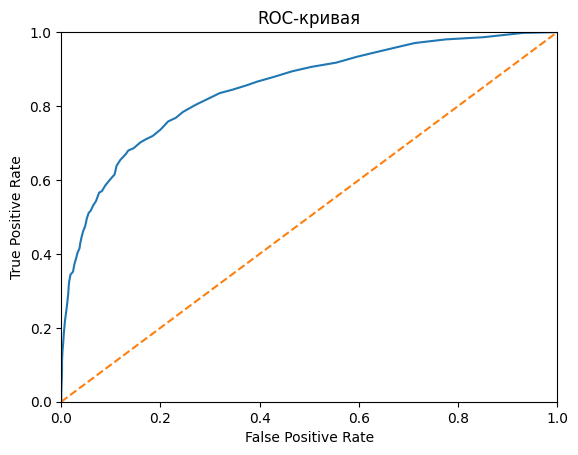

In [47]:
fpr, tpr, thresholds = roc_curve(target_valid, best_model.predict_proba(features_valid)[:, 1]) 
plt.figure()

plt.plot(fpr,tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()

Наилучшие показатели были достигнуты у модели Случайного леса - F1 мера достигает значения 0,606 на валидационной метрике, а AUC-ROC - 0,85. 

Также представлена ROC-кривая, отражающая отличия предсказания модели в отличии от случайной модели, то есть насколько качество нашей модели лучше модели, предсказывающей значения 50/50

## Тестирование модели

In [48]:
predicted_test = best_model.predict(features_test) 
probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print('F1 для модели', best_model_name, ': ', f1_score(target_test, predicted_test))
print('AUC-ROC для модели', best_model_name, ': ', roc_auc_score(target_test, probabilities_one_test))

F1 для модели Случайный лес с увеличенной выборкой :  0.6004319654427647
AUC-ROC для модели Случайный лес с увеличенной выборкой :  0.8447216797790451


Наша модель на тестовой выборке показала F1 меру 0,6, AUC-ROC - 0,845. 

Цель достигнута

In [49]:
# импортируем DummyClassifier
from sklearn.dummy import DummyClassifier
# создаем наивную модель
dummy_model = DummyClassifier(strategy = 'most_frequent', random_state=12345)
# обучение наивной модели произведем по всей выборке
dummy_model.fit(features_train, target_train)
dummy_predict = dummy_model.predict(features_test)
# оценим accuracy нашей наивной модели по тестовой выборке и сравним с лучшей нашей моделью
dummy_result1 = f1_score(target_test, dummy_predict)
print('f1 наивной модели', dummy_result1)
print('f1 лучшей модели', f1_score(target_test, best_model.predict(features_test)))

f1 наивной модели 0.0
f1 лучшей модели 0.6004319654427647


результаты f1-меры для наивной модели показывает значние 0, то есть об адекватности такой модели нечего говорить)

Ниже вывел основные показатели модели dummy и нашей лучшей модели. По результатам таблицы видно, как наша модель превосходит dummy

In [50]:
from sklearn.metrics import classification_report
print(classification_report(target_test, dummy_predict))
print('________________________________________________')
print('')
print(classification_report(target_test, best_model.predict(features_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1991
           1       0.00      0.00      0.00       509

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.63      0.80      0.71      2500

________________________________________________

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1991
           1       0.67      0.55      0.60       509

    accuracy                           0.85      2500
   macro avg       0.78      0.74      0.75      2500
weighted avg       0.84      0.85      0.85      2500

